In [3]:
# %autoreload
import numpy as np
import matplotlib.pyplot as plt

from evoscape.module_helper_functions import modules_from_txt, rotate_landscape, landscape_from_timecode
from evoscape.landscapes import CellDiff_Dataset_Landscape, Somitogenesis_Landscape
import evoscape.landscape_visuals as vis
from evoscape.morphogen_regimes import mr_piecewise, mr_current_regime, mr_sigmoid
from matplotlib.colors import ListedColormap, BoundaryNorm, CenteredNorm, Normalize

from matplotlib import style
style.use('default')

%load_ext autoreload

In [4]:
plt.rcParams.update({'figure.dpi': 200})
plt.rcParams.update({'font.size': 15})
plt.rcParams['axes.grid'] = False

save_dir = '../frames/'

In [16]:
data_dir = '../alfyn_results_stage2/saved_files_10/CellDiff_Dataset_Landscape/'
file_name = data_dir + 'optimization_log.csv'

# log = pd.read_csv(file_name, sep='\t', names=['Timecode', 'Init timecode', 'Fitness'], skiprows=1)
log = np.genfromtxt(file_name, delimiter='\t', skip_header=1, names=['Timecode', 'Init_timecode', 'Fitness'], dtype=None, encoding='utf-8')

n_landscapes = 60
fitness_threshold = np.partition(log['Fitness'], -n_landscapes)[-n_landscapes]
print(fitness_threshold)
timecodes = log['Timecode'][log['Fitness'] >= fitness_threshold]


# def landscape_from_timecode(timecode, data_dir, gen, landscape_pars):
#     filename = data_dir + timecode + '/' + timecode + '_module_list_' + str(gen) + '.txt'
#     with open(filename, 'r') as f:
#         module_list = modules_from_txt(filename)
#     landscape = CellDiff_Dataset_Landscape(module_list, A0=landscape_pars['A0'], regime=mr_piecewise, n_regimes=5)
#     return landscape

landscape_pars = {
    'A0': 0.005,
    'regime': mr_piecewise,
}
gen = 300

-0.5686603997246658


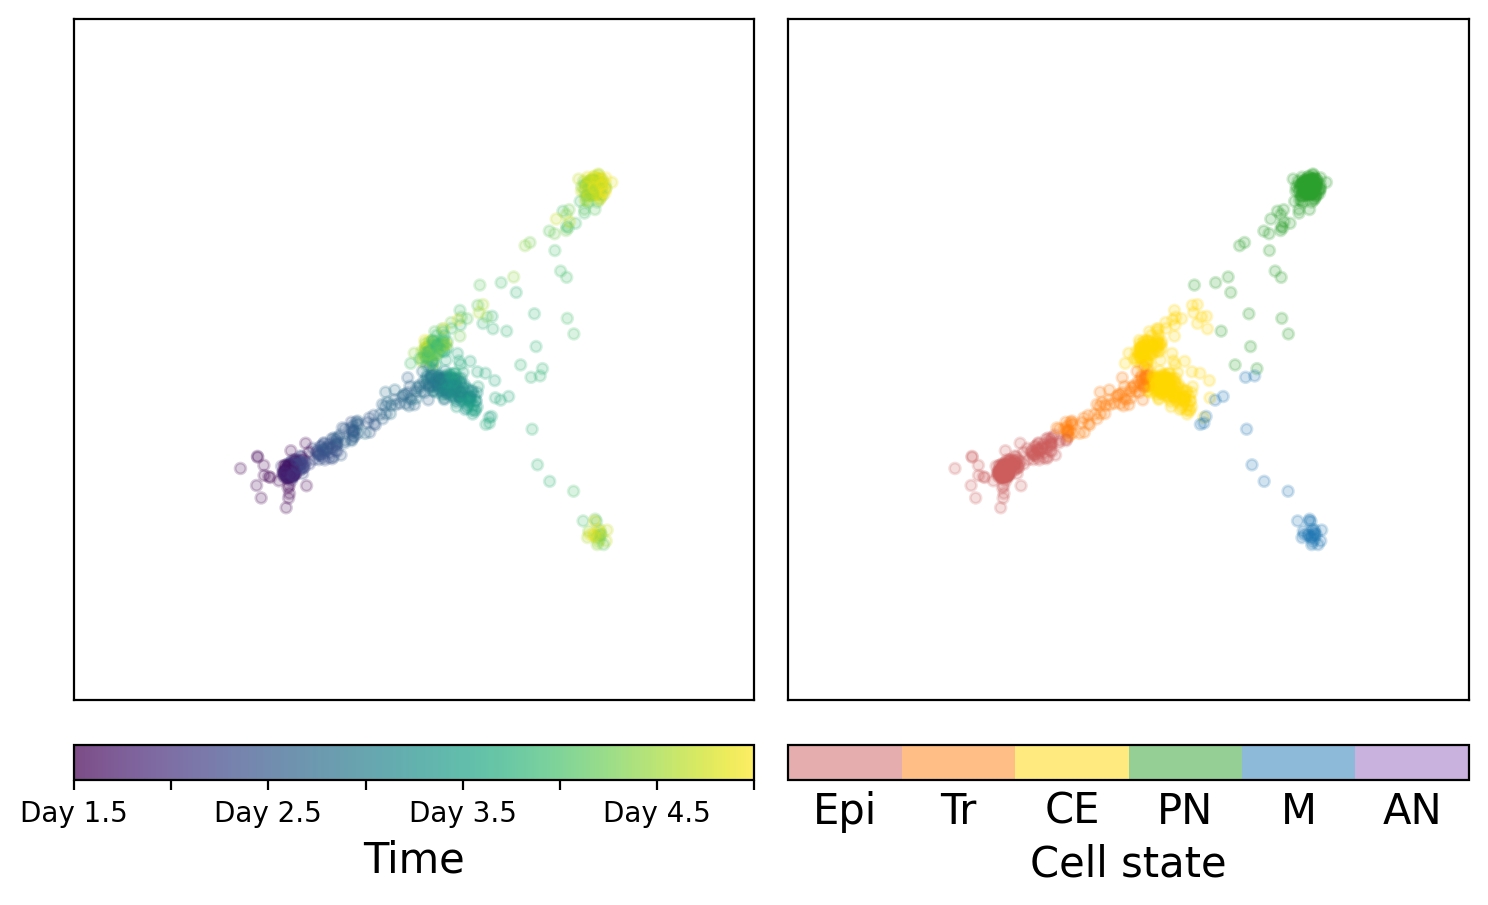

In [17]:
%autoreload

L = 5.
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')

colors = ('indianred', 'tab:orange', 'gold', 'tab:green', 'tab:blue', 'tab:purple')
cmap_state = ListedColormap(colors)
norm_state = BoundaryNorm(np.arange(len(colors)+1) - 0.5, cmap_state.N)
state_names = ('Epi', 'Tr', 'CE', 'PN', 'M', 'AN')

noise = 0.2
ndt = 50
nt = 15
ncells = 300


init_state = 2

origin = 2
direction = (3,4)
right = None
bottom = 4
left = 0

delta=2.
# morphogen_times = (delta*1, delta*3, delta*7, delta*7)  # exp 5
morphogen_times = (delta*1, delta*3, delta*3, delta*3)  # exp 2: Chir 2-3

time_pars = (0, delta*7, 25)

# ______________

ind =  51 # 49, 58   # Select landscape sample

landscape = landscape_from_timecode(timecodes[ind], data_dir, gen, landscape_pars)
landscape = rotate_landscape(landscape, origin=origin, direction=direction, left=left, right=right, bottom=bottom)
landscape.morphogen_times = morphogen_times


time_pars = (0, delta*5, 25)
landscape.init_cells(30, 0, noise)
fig = vis.get_and_plot_traj(landscape, *time_pars, 4, noise, ndt = ndt, s=15, state_names=state_names,
                            t_ticks = (0, delta*5, 8),
                            t_names=('Day 1.5', '', 'Day 2.5', '', 'Day 3.5', '', 'Day 4.5', ''),)
                            # t_names=('', 'Day 2', '', 'Day 3', '', 'Day 4', '', 'Day 5'),)
plt.show()

In [18]:
# %autoreload

n_frames = 300
time_pars = (0, delta*7, n_frames)
# morphogen_times = (delta*1, delta*3, delta*10, delta*10)  # exp 5
morphogen_times = (delta*1, delta*3, delta*3, delta*3)  # exp 2: Chir 2-3

labels = ('FGF', 'FGF+CHIR', 'CHIR', 'CHIR+end.FGF', 'End.FGF')
n_cells = 50
noise = 0.2

for ind in range(60): #
    filename = f"exp2_{ind}.gif"
    landscape = landscape_from_timecode(timecodes[ind], data_dir, gen, landscape_pars)
    landscape = rotate_landscape(landscape, origin=origin, direction=direction, left=left, right=right, bottom=bottom)
    landscape.morphogen_times = morphogen_times
    vis.make_movie_discrete(landscape, xx, yy, labels, time_pars, n_cells, noise, save_dir=save_dir, filename=filename)

Movie saved to ../frames/exp2_0.gif
Movie saved to ../frames/exp2_1.gif
Movie saved to ../frames/exp2_2.gif
Movie saved to ../frames/exp2_3.gif
Movie saved to ../frames/exp2_4.gif
Movie saved to ../frames/exp2_5.gif
Movie saved to ../frames/exp2_6.gif
Movie saved to ../frames/exp2_7.gif
Movie saved to ../frames/exp2_8.gif
Movie saved to ../frames/exp2_9.gif
Movie saved to ../frames/exp2_10.gif
Movie saved to ../frames/exp2_11.gif
Movie saved to ../frames/exp2_12.gif
Movie saved to ../frames/exp2_13.gif
Movie saved to ../frames/exp2_14.gif
Movie saved to ../frames/exp2_15.gif
Movie saved to ../frames/exp2_16.gif
Movie saved to ../frames/exp2_17.gif
Movie saved to ../frames/exp2_18.gif
Movie saved to ../frames/exp2_19.gif
Movie saved to ../frames/exp2_20.gif
Movie saved to ../frames/exp2_21.gif
Movie saved to ../frames/exp2_22.gif
Movie saved to ../frames/exp2_23.gif
Movie saved to ../frames/exp2_24.gif
Movie saved to ../frames/exp2_25.gif
Movie saved to ../frames/exp2_26.gif
Movie saved

## Somitogenesis movies

In [5]:
data_dir = '../alfyn_results/saved_files_somites_1/Somitogenesis_Landscape/'
file_name = data_dir + 'optimization_log.csv'


log = np.genfromtxt(file_name, delimiter='\t', skip_header=1, names=['Timecode', 'Fitness'], dtype=None, encoding='utf-8')
print(log.shape)

n_landscapes = 30
fitness_threshold = np.partition(log['Fitness'], -n_landscapes)[-n_landscapes]
print(fitness_threshold)
timecodes = log['Timecode'][log['Fitness'] >= fitness_threshold]


(31,)
0.9999440004695774


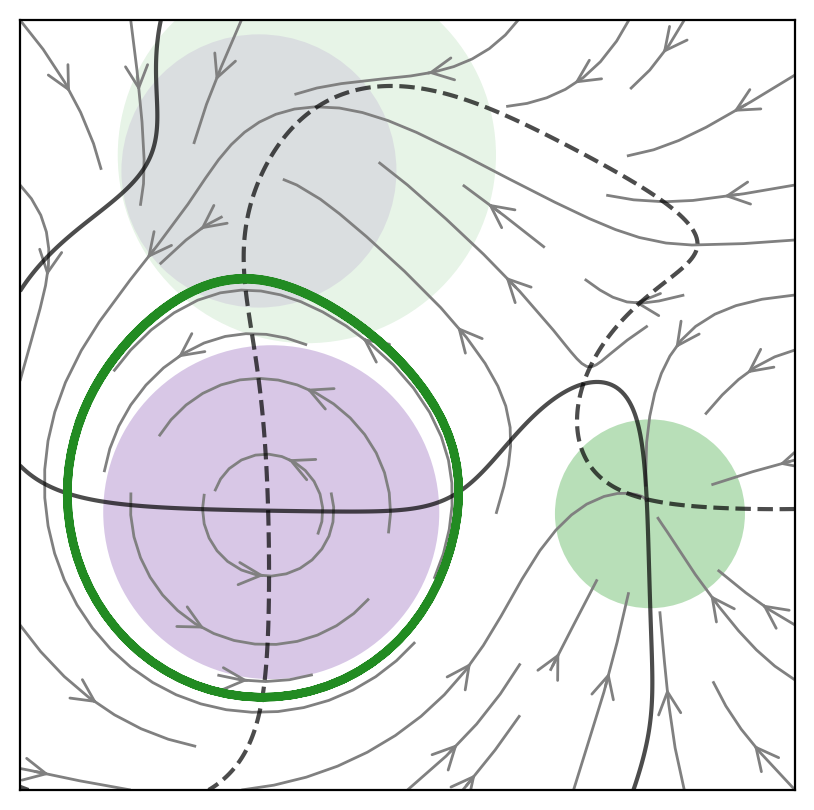

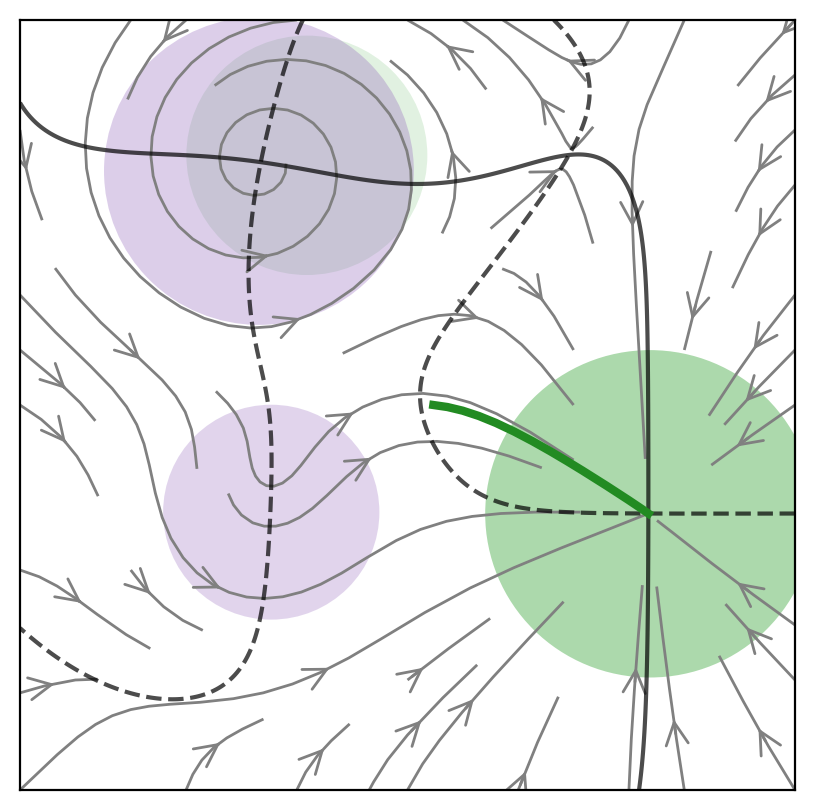

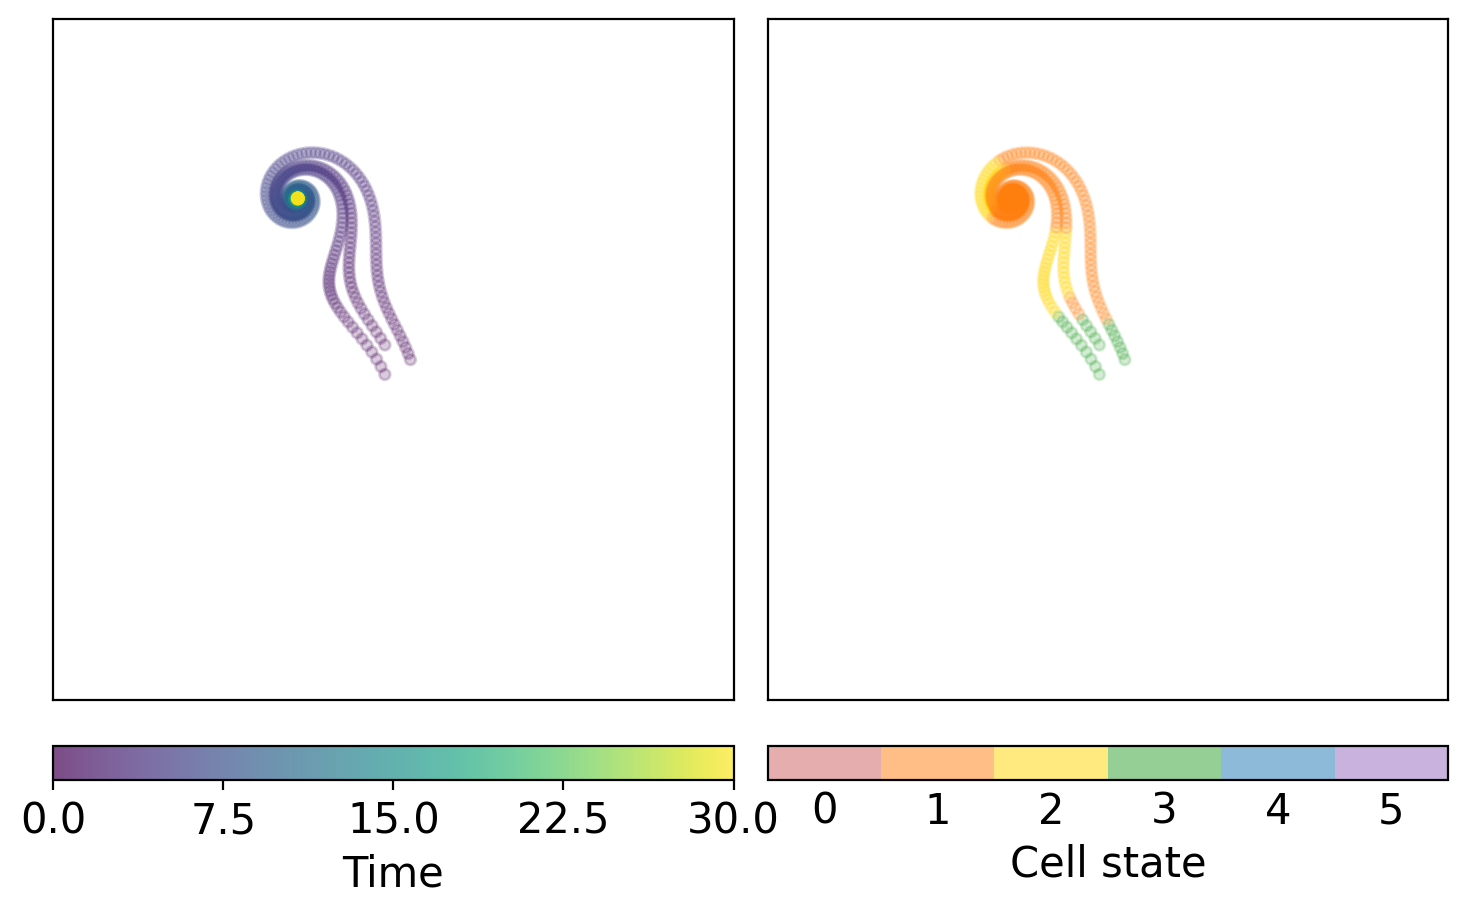

In [26]:
%autoreload

landscape_pars = {
    'A0': 0.005,
    'regime': mr_sigmoid,
}
gen = 29

L = 3.
npoints = 301
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')

noise = 0.
ndt = 50
ncells = 3
r = 0.2
thetas = np.linspace(0., 2*np.pi, ncells, endpoint=False)
init_state = np.array((r*np.cos(thetas), r*np.sin(thetas)))
init_0 = init_state[:, 0]

time_pars = (0, 30, 301)
morphogen_times = (5.,)

# ______________

ind =  10  # Select landscape sample

landscape = landscape_from_timecode(Somitogenesis_Landscape, timecodes[ind], data_dir, gen, landscape_pars)
landscape.morphogen_times = morphogen_times

vig = vis.visualize_landscape_t(landscape, xx, yy, -10., color_scheme='fp_types', circles=True,
                                traj_times=time_pars, traj_init_cond=init_0, traj_arrow=False)
vig = vis.visualize_landscape_t(landscape, xx, yy, +10., color_scheme='fp_types', circles=True,
                                traj_times=time_pars, traj_init_cond=init_0, traj_arrow=False)


landscape.init_cells(ncells, init_state, noise)
fig = vis.get_and_plot_traj(landscape, *time_pars, 4, noise, ndt = ndt, s=15, state_names=None,
                            t_ticks = (0, time_pars[1], 5),
                            t_names=None)
plt.show()

In [21]:
%autoreload

noise = 0.
# ndt = 50
ncells = 15


time_pars = (0, 40, 501)
morphogen_times = (15.,)


# for ind in range(20):
for ind in (10,):
    filename = f"somite_{ind}.gif"
    landscape = landscape_from_timecode(Somitogenesis_Landscape, timecodes[ind], data_dir, gen, landscape_pars)

    # circular init cond
    r0 = (0., 0.)
    A = 0.
    for m in landscape.module_list:
        if m.__class__.__name__ == 'Center' or m.__class__.__name__ == 'NegCenter':
            A_cur = m.a[0]*m.s[0]**2
            if A_cur > A:
                r0 = (m.x, m.y)
    r = 0.5
    thetas = np.linspace(0., 2*np.pi, ncells, endpoint=False)
    init_state = np.array((r0[0] + r*np.cos(thetas), r0[1] +r*np.sin(thetas)))
    init_0 = init_state[:, 0]

     # pre-run init cond
    # landscape.init_cells(ncells, (0., 0.,), 0.)
    # traj, states =landscape.run_cells(0., 10., ncells, noise=0., ndt=200, frozen=True, t_freeze=0)
    # init_state = traj[:, 0, :]

    landscape.morphogen_times = morphogen_times
    vis.make_movie(landscape, xx, yy, time_pars, ncells, noise, init_cond=init_state,
                   save_dir=save_dir, filename=filename, circle_opacity=0.32, nullclines=True)
                   # traj_times=(0, 30, 101), traj_init_cond=init_0, )

Movie saved to ../frames/somite_10.gif
